In [1]:
#Data Loading:
import pandas as pd
df=pd.read_csv('mtsamples.csv')
import pandas as pd
list(df.columns)

['Unnamed: 0',
 'description',
 'medical_specialty',
 'sample_name',
 'transcription',
 'keywords']

In [2]:
#Remove irrelevant Columns:'

del df['Unnamed: 0']
df_classify=df[["transcription","medical_specialty"]]
df_classify['medical_specialty']=df_classify['medical_specialty'].str.strip()
df_classify.describe()

C:\Users\Farhana\AppData\Local\Temp/ipykernel_10064/4125278112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify['medical_specialty']=df_classify['medical_specialty'].str.strip()


,transcription,medical_specialty
count,4966,4999
unique,2357,40
top,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",Surgery
freq,5,1103


In [3]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
#Remove Null values

import numpy as np
#df_classify.notnull().sum().sort_values(ascending=False)
nullindex=np.where(df_classify['transcription'].isnull() == True)[0]
#df_classifynotnull = pd.isnull(df_classify["transcription"])=True 
#df_classify.dropna(inplace=True)
nullindex
df_classify.drop(nullindex,inplace = True)
df_classify.shape

C:\Users\Farhana\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4966, 2)

In [5]:
df_classify[["medical_specialty"]].value_counts()

medical_specialty            
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Dentistry                          27
Cosmetic / Plastic S

Text(0.5, 1.0, 'Comparison between different medical specialities')

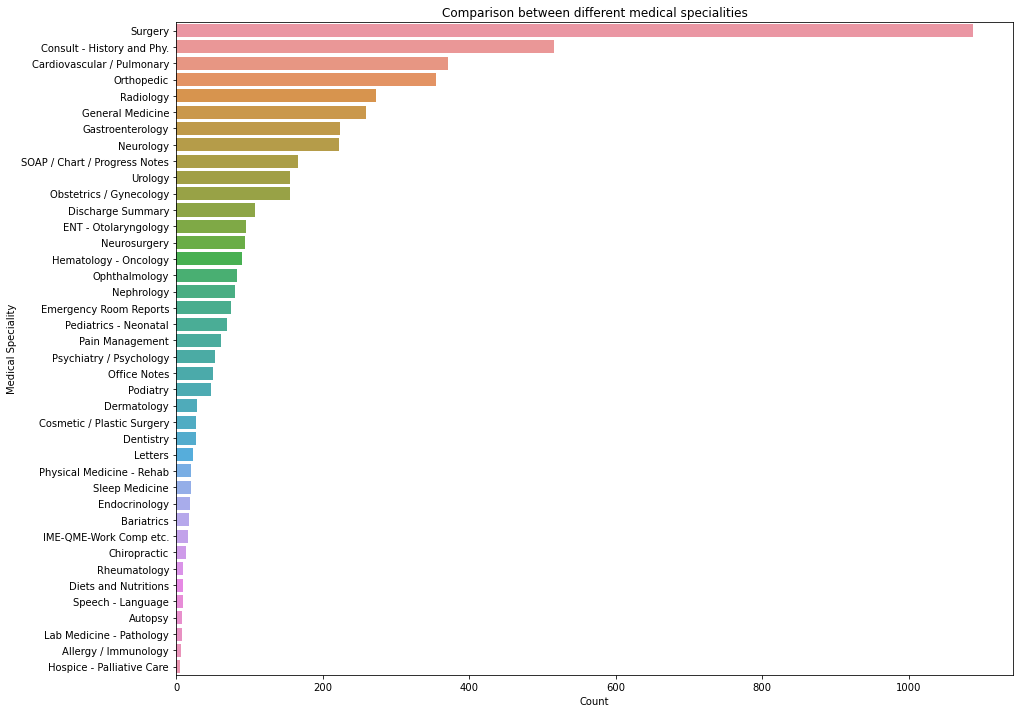

In [6]:
#Barplot of Classes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
df_count = df_classify['medical_specialty'].value_counts()
df_count
y = np.array(df_count.index)
x = np.array(df_count.values)
plt.figure(figsize=(15,12))
sns.barplot(x=x,y=y)
plt.ylabel('Medical Speciality')
plt.yticks(rotation=0)
plt.xlabel('Count')
plt.title('Comparison between different medical specialities')
#plt.savefig('Sentiment.eps')


In [7]:
#Cleaning data

names=((df_classify[["medical_specialty"]].value_counts()).index)
selected=names[np.where(df_classify[["medical_specialty"]].value_counts()>50)]
print(selected)
removed_cat=list(['Discharge Summary','Consult - History and Phy.','SOAP / Chart / Progress Notes','Emergency Room Reports','Office Notes',
                 'Letters','Surgery','Radiology','Orthopedic','General Medicine'])

MultiIndex([(                      'Surgery',),
            (   'Consult - History and Phy.',),
            (   'Cardiovascular / Pulmonary',),
            (                   'Orthopedic',),
            (                    'Radiology',),
            (             'General Medicine',),
            (             'Gastroenterology',),
            (                    'Neurology',),
            ('SOAP / Chart / Progress Notes',),
            (                      'Urology',),
            (      'Obstetrics / Gynecology',),
            (            'Discharge Summary',),
            (         'ENT - Otolaryngology',),
            (                 'Neurosurgery',),
            (        'Hematology - Oncology',),
            (                'Ophthalmology',),
            (                   'Nephrology',),
            (       'Emergency Room Reports',),
            (        'Pediatrics - Neonatal',),
            (              'Pain Management',),
            (      'Psychiatry / Psychol

np.where(df_classify[["medical_specialty"]].isin(["Nephrology"])== True)[0]
(df_classify[df_classify['medical_specialty'].isin(aList)]).shape


In [8]:
#Cleaning data

import functools
import operator
aList=list(functools.reduce(operator.add, (selected)))
df_new=df_classify[df_classify['medical_specialty'].isin(aList)]
df_new.shape


(4597, 2)

In [9]:
#Cleaning data

df_new2=df_new[~df_new['medical_specialty'].isin(removed_cat)]
df_new=df_new2
df_new.reset_index(inplace=True)
del df_new['index']
df_new.head()

,transcription,medical_specialty
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary


In [10]:
from sklearn import preprocessing
target = preprocessing.LabelEncoder()
target.fit(df_new['medical_specialty'])
target.classes_.shape

(13,)

In [11]:
target.classes_

array(['Cardiovascular / Pulmonary', 'ENT - Otolaryngology',
       'Gastroenterology', 'Hematology - Oncology', 'Nephrology',
       'Neurology', 'Neurosurgery', 'Obstetrics / Gynecology',
       'Ophthalmology', 'Pain Management', 'Pediatrics - Neonatal',
       'Psychiatry / Psychology', 'Urology'], dtype=object)

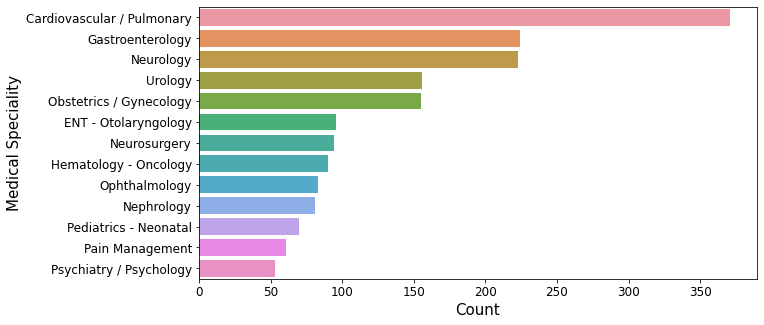

In [12]:
#Barplot of cleaned data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_count2 = df_new['medical_specialty'].value_counts()
#df_count2
x = np.array(df_count2.values)
y = np.array(df_count2.index)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y)
#plt.yticks(rotation=0)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Medical Speciality',fontsize=15)
#plt.title('Barplot of medical specialities',fontsize=15)


plt.tick_params(direction='out', labelsize='large')
plt.savefig('data.svg')


In [13]:
# Stop warnings

import warnings
warnings.filterwarnings("ignore")

In [14]:
#Data preprocessing

import spacy

nlp = spacy.load("en_core_web_lg")#, disable=["tagger", "parser", "ner"])
stop=["PROCEDURE","DIAGNOSIS","DESCRIPTION","PREOPERATIVE","PAST","SUBJECTIVE"]        
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if (token.is_stop ==False and token.lemma_ not in stop 
                                              and len(token.lemma_)>1 and token.lemma_.isalpha()==True)]

In [15]:
#preprocessed=preprocess(df_new['transcription'])
df_new['preprocessed'] = df_new['transcription'].apply(preprocess)

In [16]:
df_new.head()

,transcription,medical_specialty,preprocessed
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[MODE, left, atrial, enlargement, left, atrial..."
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[left, ventricular, cavity, size, wall, thickn..."
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,"[ECHOCARDIOGRAM, multiple, view, heart, great,..."
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[normal, cardiac, chamber, size, normal, left,..."
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[mild, aortic, stenosis, widely, calcify, mini..."


In [17]:
df_new[["medical_specialty"]].value_counts()

medical_specialty         
Cardiovascular / Pulmonary    371
Gastroenterology              224
Neurology                     223
Urology                       156
Obstetrics / Gynecology       155
ENT - Otolaryngology           96
Neurosurgery                   94
Hematology - Oncology          90
Ophthalmology                  83
Nephrology                     81
Pediatrics - Neonatal          70
Pain Management                61
Psychiatry / Psychology        53
dtype: int64

In [18]:
#Merge preprocessed data

import string
def cleaned(dat):
    all_spam_cleaned = []
    for text in dat:
        text = [x.strip(string.punctuation) for x in text]
        all_spam_cleaned.append(text)
    text_spam = ["".join(text) for text in all_spam_cleaned]
    final_text_spam = " ".join(text_spam)
    return(final_text_spam)

#cleaned(df_new['preprocessed'][0])

df_new['cleaned']=df_new['preprocessed'].apply(cleaned)
df_new

,transcription,medical_specialty,preprocessed,cleaned
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[MODE, left, atrial, enlargement, left, atrial...",MODE left atrial enlargement left atrial diame...
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[left, ventricular, cavity, size, wall, thickn...",left ventricular cavity size wall thickness ap...
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,"[ECHOCARDIOGRAM, multiple, view, heart, great,...",ECHOCARDIOGRAM multiple view heart great vesse...
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[normal, cardiac, chamber, size, normal, left,...",normal cardiac chamber size normal left ventri...
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[mild, aortic, stenosis, widely, calcify, mini...",mild aortic stenosis widely calcify minimally ...
...,...,...,...,...
1752,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"[INDICATION, chest, pain, test, Adenosine, nuc...",INDICATION chest pain test Adenosine nuclear s...
1753,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,"[CHIEF, COMPLAINT, chest, pain, PRESENT, ILLNE...",CHIEF COMPLAINT chest pain PRESENT ILLNESS pat...
1754,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,"[history, PRESENT, ILLNESS, patient, year, old...",history PRESENT ILLNESS patient year old woman...
1755,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,"[history, PRESENT, ILLNESS, ABC, year, old, ge...",history PRESENT ILLNESS ABC year old gentleman...


from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
text=(df_new['cleaned'][0])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
text = " ".join(comment for comment in df_new.cleaned)
print ("There are {} words in the combination of all prescriptions.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
labels = df_new['medical_specialty'].tolist()
category_list = df_new.medical_specialty.unique()


In [20]:
#Loading Libraries:
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import KFold,GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.combine import SMOTEENN


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameter (Best CV score=0.791) from LogisticRegression using RandomOverSampler:
{'clf__l1_ratio': 0.5, 'clf__multi_class': 'multinomial', 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'vect__analyzer': 'word', 'vect__max_df': 0.75, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of LogisticRegression using RandomOverSampler: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.86      0.83      0.85       112
      ENT - Otolaryngology       0.78      0.86      0.82        29
          Gastroenterology       0.81      0.85      0.83        67
     Hematology - Oncology       0.58      0.56      0.57        27
                Nephrology       0.62      0.67      0.64        24
                 Neurology       0.83      0.78      0.80        67
              Neurosurgery       0.72      0.93      0.81        28
   

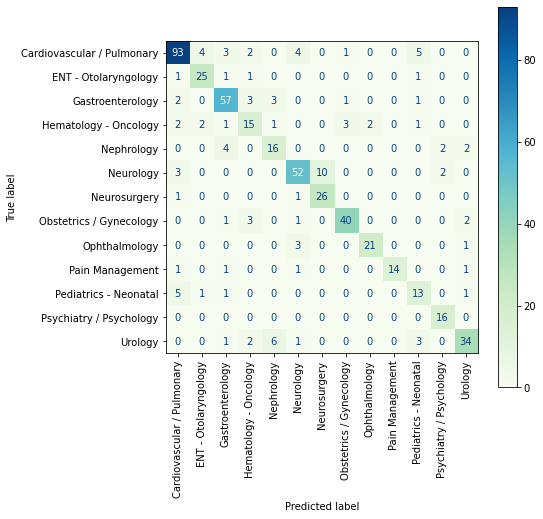

In [21]:
#Classification of Logistic Regression with RandomOverSampler

#Train test splitting
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_new['cleaned'].tolist(),df_new['medical_specialty'],
                                       stratify=labels,test_size=0.30, random_state=42)

#Creating Pipeline for all methods:
pipeline3 = Pipeline([
    ('vect',TfidfVectorizer()),
    ('smt', RandomOverSampler( random_state=42)),
    ('svd',TruncatedSVD(n_components=500, random_state=42)),
    ('clf',LogisticRegression(random_state = 42)),
])


#Parameters for all methods 

parameters3 = {
    'vect__analyzer':('word','char'),
    'vect__ngram_range':((1,3),(1,2)),
    'vect__max_df':[0.75,0.95],
    'vect__min_df':[5],
    'vect__max_features':[2000],
    'clf__penalty':['elasticnet'],
    'clf__l1_ratio':[0.5,0.6],
    'clf__solver' : ['saga'],
    'clf__multi_class':['multinomial'],
}

sfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
grid_search3 = GridSearchCV(pipeline3, parameters3, cv=sfold,n_jobs=-1, verbose=1)
fit3=grid_search3.fit(X_train3, y_train3)

print("Best parameter (Best CV score=%0.3f) from LogisticRegression using RandomOverSampler:" % grid_search3.best_score_)
print(grid_search3.best_params_)
fit_model3= grid_search3.best_estimator_
pred3 = fit_model3.predict(X_test3)


#Results 

print("Classification Report of LogisticRegression using RandomOverSampler: ")
print(classification_report(y_test3, pred3),"\n")
accuracy_3=accuracy_score(y_test3, pred3)
print("Accuracy scored from LogisticRegression using RandomOverSampler: ",accuracy_3,"\n")
conmax3=confusion_matrix(y_test3, pred3)
precision3 = precision_score(y_test3, pred3,average='macro')
print('Precision: %f' % precision3)
recall3 = recall_score(y_test3, pred3,average='macro')
print('Recall: %f' % recall3)
f1_3 = f1_score(y_test3, pred3,average='macro')
print('F1 score: %f' % f1_3)
print("Confusion_matrix of LogisticRegression using RandomOverSampler:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(fit3,X_test3,y_test3,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('LG_fit_ROC.svg')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameter (Best CV score=0.792) from LogisticRegression using SMOTE:
{'clf__l1_ratio': 0.6, 'clf__multi_class': 'multinomial', 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'vect__analyzer': 'word', 'vect__max_df': 0.95, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of LogisticRegression using SMOTE: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.86      0.83      0.85       112
      ENT - Otolaryngology       0.83      0.86      0.85        29
          Gastroenterology       0.84      0.85      0.84        67
     Hematology - Oncology       0.54      0.52      0.53        27
                Nephrology       0.62      0.67      0.64        24
                 Neurology       0.80      0.76      0.78        67
              Neurosurgery       0.67      0.86      0.75        28
   Obstetrics / Gynecology 

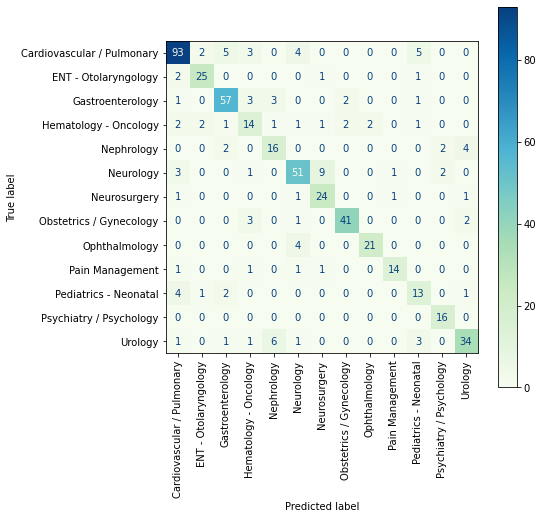

In [22]:
#Classification of Logistic Regression with SMOTE

#Train test splitting


X_train4, X_test4, y_train4, y_test4 =train_test_split(df_new['cleaned'].tolist(),df_new['medical_specialty'],
                                       stratify=labels,test_size=0.30, random_state=42)


#Creating Pipeline for all methods:

pipeline4 = Pipeline([
    ('vect',TfidfVectorizer()),
    ('smt', SMOTE(random_state=42)),
      ('svd',TruncatedSVD(n_components=500, random_state=42)),
    ('clf',LogisticRegression(random_state = 42)),
])

#Parameters for all methods 

parameters4 = {
    'vect__analyzer':('word','char'),
    'vect__ngram_range':((1,3),(1,2)),
    'vect__max_df':[0.75,0.95],
    'vect__min_df':[5],
    'vect__max_features':[2000],
    'clf__penalty':['elasticnet'],
    'clf__l1_ratio':[0.5,0.6],
    'clf__solver' : ['saga'],
    'clf__multi_class':['multinomial'],
}

sfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

grid_search4 = GridSearchCV(pipeline4, parameters4, cv=sfold,n_jobs=-1, verbose=1)

fit4=grid_search4.fit(X_train4, y_train4)

print("Best parameter (Best CV score=%0.3f) from LogisticRegression using SMOTE:" % grid_search4.best_score_)
print(grid_search4.best_params_)
fit_model4= grid_search4.best_estimator_
pred4 = fit_model4.predict(X_test4)


#Results 

print("Classification Report of LogisticRegression using SMOTE: ")
print(classification_report(y_test4, pred4),"\n")
accuracy_4=accuracy_score(y_test4, pred4)
print("Accuracy scored from LogisticRegression using SMOTE: ",accuracy_4,"\n")
conmax4=confusion_matrix(y_test4, pred4)
precision4 = precision_score(y_test4, pred4,average='macro')
print('Precision: %f' % precision4)
recall4 = recall_score(y_test4, pred4,average='macro')
print('Recall: %f' % recall4)
f1_4 = f1_score(y_test4, pred4,average='macro')
print('F1 score: %f' % f1_4)
print("Confusion_matrix of LogisticRegression using SMOTE:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(fit4,X_test4,y_test4,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('LG_smote.svg')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameter (Best CV score=0.670) from LogisticRegression using RandomUnderSampler:
{'clf__l1_ratio': 0.5, 'clf__multi_class': 'multinomial', 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'vect__analyzer': 'word', 'vect__max_df': 0.95, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 3)}
Classification Report of LogisticRegression using RandomUnderSampler: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.90      0.70      0.78       112
      ENT - Otolaryngology       0.66      0.79      0.72        29
          Gastroenterology       0.93      0.63      0.75        67
     Hematology - Oncology       0.46      0.48      0.47        27
                Nephrology       0.54      0.79      0.64        24
                 Neurology       0.81      0.70      0.75        67
              Neurosurgery       0.55      0.82      0.66        28
 

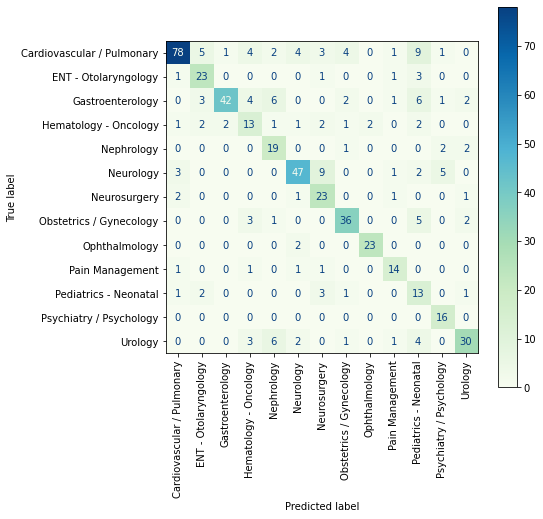

In [23]:
#Classification of LinearSVC with RandomUnderSampler

#Train test splitting

X_train5, X_test5, y_train5, y_test5 =train_test_split(df_new['cleaned'].tolist(),df_new['medical_specialty'],
                                       stratify=labels,test_size=0.30, random_state=42)


#Creating Pipeline for all methods:

pipeline5 = Pipeline([
    ('vect',TfidfVectorizer()),
     ('rm',RandomUnderSampler( random_state=42)),
      ('svd',TruncatedSVD(n_components=500, random_state=42)),
    ('clf',LogisticRegression(random_state = 42)),
])


#Parameters for all methods 

parameters5 = {
    'vect__analyzer':('word','char'),
    'vect__ngram_range':((1,3),(1,2)),
    'vect__max_df':[0.75,0.95],
    'vect__min_df':[5],
    'vect__max_features':[2000],
    'clf__penalty':['elasticnet'],
    'clf__l1_ratio':[0.5,0.6],
    'clf__solver' : ['saga'],
    'clf__multi_class':['multinomial'],
}

sfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
grid_search5 = GridSearchCV(pipeline5, parameters5, cv=sfold,n_jobs=-1, verbose=1)
fit5=grid_search5.fit(X_train5, y_train5)

print("Best parameter (Best CV score=%0.3f) from LogisticRegression using RandomUnderSampler:" % grid_search5.best_score_)
print(grid_search5.best_params_)
fit_model5= grid_search5.best_estimator_
pred5 = fit_model5.predict(X_test5)


#Results 

print("Classification Report of LogisticRegression using RandomUnderSampler: ")
print(classification_report(y_test5, pred5),"\n")
accuracy_5=accuracy_score(y_test5, pred5)
print("Accuracy scored from LogisticRegression using RandomUnderSampler: ",accuracy_5,"\n")
conmax5=confusion_matrix(y_test5, pred5)
precision5 = precision_score(y_test5, pred5,average='macro')
print('Precision: %f' % precision5)
recall5 = recall_score(y_test5, pred5,average='macro')
print('Recall: %f' % recall5)
f1_5 = f1_score(y_test5, pred5,average='macro')
print('F1 score: %f' % f1_5)
print("Confusion_matrix of LogisticRegression using RandomUnderSampler:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(fit5,X_test5,y_test5,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('LG_rus.svg')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameter (Best CV score=0.687) from LogisticRegression using SMOTEENN:
{'clf__l1_ratio': 0.6, 'clf__multi_class': 'multinomial', 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'vect__analyzer': 'word', 'vect__max_df': 0.75, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of LogisticRegression using SMOTEENN: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.95      0.35      0.51       112
      ENT - Otolaryngology       0.83      0.86      0.85        29
          Gastroenterology       0.69      0.85      0.76        67
     Hematology - Oncology       0.32      0.67      0.43        27
                Nephrology       0.48      0.83      0.61        24
                 Neurology       0.80      0.72      0.76        67
              Neurosurgery       0.55      0.86      0.67        28
   Obstetrics / Gynec

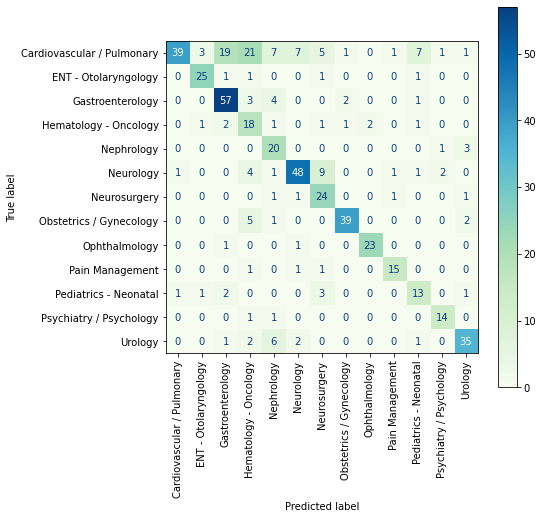

In [24]:
#Classification of LinearSVC with SMOTEENN

#Train test splitting


X_train6, X_test6, y_train6, y_test6 =train_test_split(df_new['cleaned'].tolist(),df_new['medical_specialty'],
                                      stratify=labels, test_size=0.30, random_state=42)

#Creating Pipeline for all methods: 

pipeline6 = Pipeline([
    ('vect',TfidfVectorizer()),
    ('smt', SMOTEENN( random_state=42)),
      ('svd',TruncatedSVD(n_components=500, random_state=42)),
    ('clf',LogisticRegression(random_state = 42)),
])

#Parameters for all methods 

parameters6 = {
    'vect__analyzer':('word','char'),
    'vect__ngram_range':((1,3),(1,2)),
    'vect__max_df':[0.75,0.95],
    'vect__min_df':[5],
    'vect__max_features':[2000],
    'clf__penalty':['elasticnet'],
    'clf__l1_ratio':[0.5,0.6],
    'clf__solver' : ['saga'],
    'clf__multi_class':['multinomial'],
}
 
sfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
grid_search6 = GridSearchCV(pipeline6, parameters6, cv=sfold,n_jobs=-1, verbose=1)
fit6=grid_search6.fit(X_train6, y_train6)

print("Best parameter (Best CV score=%0.3f) from LogisticRegression using SMOTEENN:" % grid_search6.best_score_)
print(grid_search6.best_params_)
fit_model6= grid_search6.best_estimator_
pred6 = fit_model6.predict(X_test6)


#Results 


print("Classification Report of LogisticRegression using SMOTEENN: ")
print(classification_report(y_test6, pred6),"\n")
accuracy_6=accuracy_score(y_test6, pred6)
print("Accuracy scored from LogisticRegression using SMOTEENN: ",accuracy_6,"\n")
conmax6=confusion_matrix(y_test6, pred6)
precision6 = precision_score(y_test6, pred6,average='macro')
print('Precision: %f' % precision6)
recall6 = recall_score(y_test6, pred6,average='macro')
print('Recall: %f' % recall6)
f1_6 = f1_score(y_test6, pred6,average='macro')
print('F1 score: %f' % f1_6)
print("Confusion_matrix of LogisticRegression using SMOTEENN:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(fit6,X_test6,y_test6,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('LG_smoteenn.svg')

In [25]:
#Results obtained from all classifications:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data={'Classification Tech':['RandomOverSampler','SMOTE','RandomUnderSampler','SMOTEENN'],
      'Accuracy': [accuracy_3,accuracy_4,accuracy_5,accuracy_6],
      'Precision': [precision3,precision4,precision5,precision6],
      'Recall': [recall3,recall4,recall5,recall6],
      'F1-score': [f1_3,f1_4,f1_5,f1_6]}
     
comparedf=round(pd.DataFrame(data),2)
comparedf

,Classification Tech,Accuracy,Precision,Recall,F1-score
0,RandomOverSampler,0.80,0.78,0.79,0.78
1,SMOTE,0.79,0.77,0.78,0.77
2,RandomUnderSampler,0.71,0.69,0.74,0.70
3,SMOTEENN,0.70,0.72,0.77,0.72
